![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [54]:
# Start your code here!
library(tidyverse)

## 1. Explore and filter data

In [55]:
# Load men dataset
men <- read_csv("men_results.csv")
glimpse(men)

New names:
• `` -> `...1`
Rows: 44353 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 44,353
Columns: 7
$ ...1       <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ date       <date> 1872-11-30, 1873-03-08, 1874-03-07, 1875-03-06, 1876-03-04…
$ home_team  <chr> "Scotland", "England", "Scotland", "England", "Scotland", "…
$ away_team  <chr> "England", "Scotland", "England", "Scotland", "England", "W…
$ home_score <dbl> 0, 4, 2, 2, 3, 4, 1, 0, 7, 9, 2, 5, 0, 5, 2, 5, 0, 1, 1, 0,…
$ away_score <dbl> 0, 2, 1, 2, 0, 0, 3, 2, 2, 0, 1, 4, 3, 4, 3, 1, 1, 6, 5, 13…
$ tournament <chr> "Friendly", "Friendly", "Friendly", "Friendly", "Friendly",…


In [56]:
# see what tournament contain
unique(men$tournament)

[1] "Friendly"                                     
  [2] "British Home Championship"                    
  [3] "Évence Coppée Trophy"                         
  [4] "Copa Lipton"                                  
  [5] "Copa Newton"                                  
  [6] "Copa Premio Honor Argentino"                  
  [7] "Copa Premio Honor Uruguayo"                   
  [8] "Copa Roca"                                    
  [9] "Copa América"                                 
 [10] "Copa Chevallier Boutell"                      
 [11] "Nordic Championship"                          
 [12] "Central European International Cup"           
 [13] "Baltic Cup"                                   
 [14] "Balkan Cup"                                   
 [15] "FIFA World Cup"                               
 [16] "Copa Rio Branco"                              
 [17] "FIFA World Cup qualification"                 
 [18] "Bolivarian Games"                             
 [19] "CCCF Championship"                            
 [20] "NAFC Championship"                            
 [21] "Copa Oswaldo Cruz"                            
 [22] "Pan American Championship"                    
 [23] "Copa del Pacífico"                            
 [24] "Copa Bernardo O'Higgins"                      
 [25] "AFC Asian Cup qualification"                  
 [26] "Atlantic Cup"                                 
 [27] "AFC Asian Cup"                                
 [28] "African Cup of Nations"                       
 [29] "Copa Paz del Chaco"                           
 [30] "Merdeka Tournament"                           
 [31] "UEFA Euro qualification"                      
 [32] "UEFA Euro"                                    
 [33] "Windward Islands Tournament"                  
 [34] "African Cup of Nations qualification"         
 [35] "Vietnam Independence Cup"                     
 [36] "Copa Carlos Dittborn"                         
 [37] "Phillip Seaga Cup"                            
 [38] "CONCACAF Championship"                        
 [39] "Copa Juan Pinto Durán"                        
 [40] "Arab Cup"                                     
 [41] "South Pacific Games"                          
 [42] "CONCACAF Championship qualification"          
 [43] "Copa Artigas"                                 
 [44] "GaNEFo"                                       
 [45] "King's Cup"                                   
 [46] "Gulf Cup"                                     
 [47] "Indonesia Tournament"                         
 [48] "Korea Cup"                                    
 [49] "Palestine Cup"                                
 [50] "Brazil Independence Cup"                      
 [51] "Copa Ramón Castilla"                          
 [52] "Oceania Nations Cup"                          
 [53] "CECAFA Cup"                                   
 [54] "Kuneitra Cup"                                 
 [55] "Copa Félix Bogado"                            
 [56] "Real Madrid 75th Anniversary Cup"             
 [57] "Beijing International Friendship Tournament"  
 [58] "Kirin Cup"                                    
 [59] "CFU Caribbean Cup qualification"              
 [60] "CFU Caribbean Cup"                            
 [61] "Amílcar Cabral Cup"                           
 [62] "FIFA 75th Anniversary Cup"                    
 [63] "Guangzhou International Friendship Tournament"
 [64] "Mundialito"                                   
 [65] "West African Cup"                             
 [66] "Nehru Cup"                                    
 [67] "Merlion Cup"                                  
 [68] "Great Wall Cup"                               
 [69] "UDEAC Cup"                                    
 [70] "Rous Cup"                                     
 [71] "CONMEBOL–UEFA Cup of Champions"               
 [72] "Lunar New Year Cup"                           
 [73] "Arab Cup qualification"                       
 [74] "Tournoi de France"                            
 [75] 

In [57]:
# Filter men dataset
men_clean <- men %>%
	select(-1) %>%
	filter(date >= '2002-01-01' & tournament == "FIFA World Cup") %>%
	mutate(gender = "men")

str(men_clean)

tibble [384 × 7] (S3: tbl_df/tbl/data.frame)
 $ date      : Date[1:384], format: "2002-05-31" "2002-06-01" ...
 $ home_team : chr [1:384] "France" "Germany" "Republic of Ireland" "Uruguay" ...
 $ away_team : chr [1:384] "Senegal" "Saudi Arabia" "Cameroon" "Denmark" ...
 $ home_score: num [1:384] 0 8 1 1 1 1 2 3 2 0 ...
 $ away_score: num [1:384] 1 0 1 2 0 1 2 1 1 1 ...
 $ tournament: chr [1:384] "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" ...
 $ gender    : chr [1:384] "men" "men" "men" "men" ...


In [58]:
# Load women dataset
women <- read_csv("women_results.csv")

# Filter men dataset
women_clean <- women %>%
	select(-1) %>%
	filter(date >= '2002-01-01' & tournament == "FIFA World Cup") %>%
	mutate(gender = "women")

str(women_clean)

New names:
• `` -> `...1`
Rows: 4884 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tibble [200 × 7] (S3: tbl_df/tbl/data.frame)
 $ date      : Date[1:200], format: "2003-09-20" "2003-09-20" ...
 $ home_team : chr [1:200] "Nigeria" "Norway" "Germany" "Japan" ...
 $ away_team : chr [1:200] "North Korea" "France" "Canada" "Argentina" ...
 $ home_score: num [1:200] 0 2 4 6 3 3 1 1 1 1 ...
 $ away_score: num [1:200] 3 0 1 0 1 0 2 0 4 0 ...
 $ tournament: chr [1:200] "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" ...
 $ gender    : chr [1:200] "women" "women" "women" "women" ...


## 2. Calculating the test values

In [59]:
# Bind data frame and caculate sum of score
all_df <- rbind(men_clean, women_clean) %>% 
	mutate(gender = as.factor(gender),
		   sum_score = home_score + away_score)

str(all_df)

tibble [584 × 8] (S3: tbl_df/tbl/data.frame)
 $ date      : Date[1:584], format: "2002-05-31" "2002-06-01" ...
 $ home_team : chr [1:584] "France" "Germany" "Republic of Ireland" "Uruguay" ...
 $ away_team : chr [1:584] "Senegal" "Saudi Arabia" "Cameroon" "Denmark" ...
 $ home_score: num [1:584] 0 8 1 1 1 1 2 3 2 0 ...
 $ away_score: num [1:584] 1 0 1 2 0 1 2 1 1 1 ...
 $ tournament: chr [1:584] "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" ...
 $ gender    : Factor w/ 2 levels "men","women": 1 1 1 1 1 1 1 1 1 1 ...
 $ sum_score : num [1:584] 1 8 2 3 1 2 4 4 3 1 ...


## 3. Performing the hypothesis test

Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.

In [60]:
# Check sample size of each group
table(all_df$gender)


  men women 
  384   200 

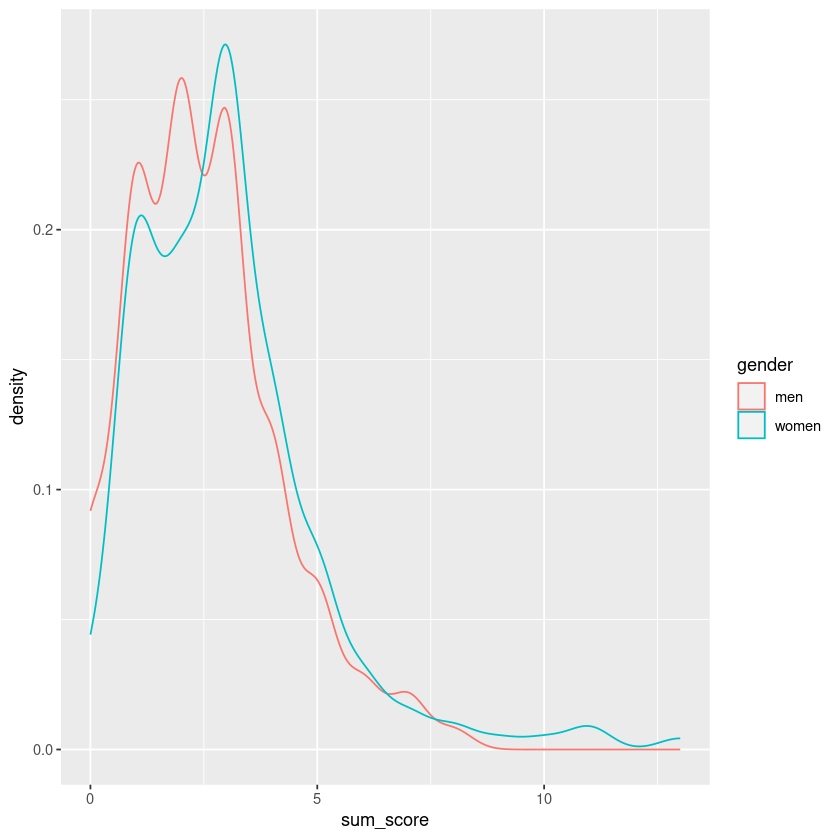

In [61]:
# Check normality of each distribution
ggplot(all_df, aes(sum_score, col = gender)) +
	geom_density()

In [62]:
# Shapiro–Wilk test to check normality
shapiro.test(all_df[all_df$gender == "men",]$sum_score)
shapiro.test(all_df[all_df$gender == "women",]$sum_score)


	Shapiro-Wilk normality test

data:  all_df[all_df$gender == "men", ]$sum_score
W = 0.92665, p-value = 8.895e-13



	Shapiro-Wilk normality test

data:  all_df[all_df$gender == "women", ]$sum_score
W = 0.8491, p-value = 3.891e-13


Since the distribution is not noramal, so non-parametric version of two sample t-test is better, which is Wilcoxon-Mann-Whitney test.

In [63]:
# Two sample t-test
model <- wilcox.test(sum_score ~ gender, data = all_df, alternative = "greater")
model


	Wilcoxon rank sum test with continuity correction

data:  sum_score by gender
W = 33527, p-value = 0.9949
alternative hypothesis: true location shift is greater than 0


## 4. Interpreting the result of the hypothesis test

In [64]:
# ans, assuming a 0.1 significance level
result_df <- data.frame(model$p.value, "fail to reject")
result_df

model.p.value,X.fail.to.reject.
<dbl>,<chr>
0.9949012,fail to reject
